In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df_charity = application_df.drop(columns=["EIN", "NAME"])
df_charity

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
df_charity.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_df = df_charity["APPLICATION_TYPE"].value_counts()

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_df[app_df < 200].index) 


# Replace in dataframe
for app in application_types_to_replace:
    df_charity['APPLICATION_TYPE'] = df_charity['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df_charity['APPLICATION_TYPE'].value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
cls = df_charity["CLASSIFICATION"].value_counts()
cls

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2500        1
C1900        1
C2570        1
C2150        1
C1570        1
Name: CLASSIFICATION, Length: 71, dtype: int64

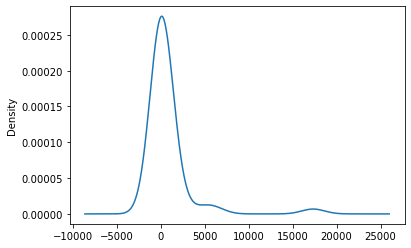

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
(cls[cls > 1]).plot.density()

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = df_charity["CLASSIFICATION"].value_counts()
classifications_to_replace = classifications_to_replace.loc[classifications_to_replace<1500].index.values


# Replace in dataframe
for cls in classifications_to_replace:
    df_charity['CLASSIFICATION'] = df_charity['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df_charity['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
ask_amt = df_charity.loc[df_charity["ASK_AMT"] == 5000] 
ask_amt

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
5,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
9,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
12,T3,CompanySponsored,C1200,Preservation,Association,1,0,N,5000,1
...,...,...,...,...,...,...,...,...,...,...
34293,T3,CompanySponsored,C1000,Preservation,Association,1,0,N,5000,1
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0


In [24]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
askamt_to_replace = df_charity["ASK_AMT"].value_counts()
askamt_to_replace = askamt_to_replace.loc[askamt_to_replace < 25398].index.values 


# Replace in dataframe
for ask in askamt_to_replace:
    df_charity['ASK_AMT'] = df_charity['ASK_AMT'].replace(app,"Other")

# Check to make sure binning was successful
df_charity['ASK_AMT'].value_counts()

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [27]:
df_charity["ASK_AMT"].value_counts()

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [29]:
df_charity.loc[df_charity["ASK_AMT"] < 25398].index.values

IndexError: Boolean index has wrong length: 8746 instead of 34299

In [25]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(df_charity)

In [13]:
# Split our preprocessed data into our features and target arrays
y= dummies["IS_SUCCESSFUL"].values
X= dummies.drop(columns= ["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=24)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                440       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 474us/step - loss: 0.5955 - accuracy: 0.7032
Epoch 2/50
662/804 [=======================>......] - ETA: 0s - loss: 0.5609 - accuracy: 0.7273

KeyboardInterrupt: 

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
#from keras.models import load_model

#nn.save('AlphabetSoupCharity_Optimization.h5')  
# del nn  

# returns a compiled model
# identical to the previous one
# model = load_model('AlphabetSoupCharity.h5')